# 2. Exercises: Applied

In [1]:
import pandas as pd
import numpy as np
import ISLP

%config InlineBackend.figure_format = "retina"

### College

In [2]:
college = ISLP.load_data("College")
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


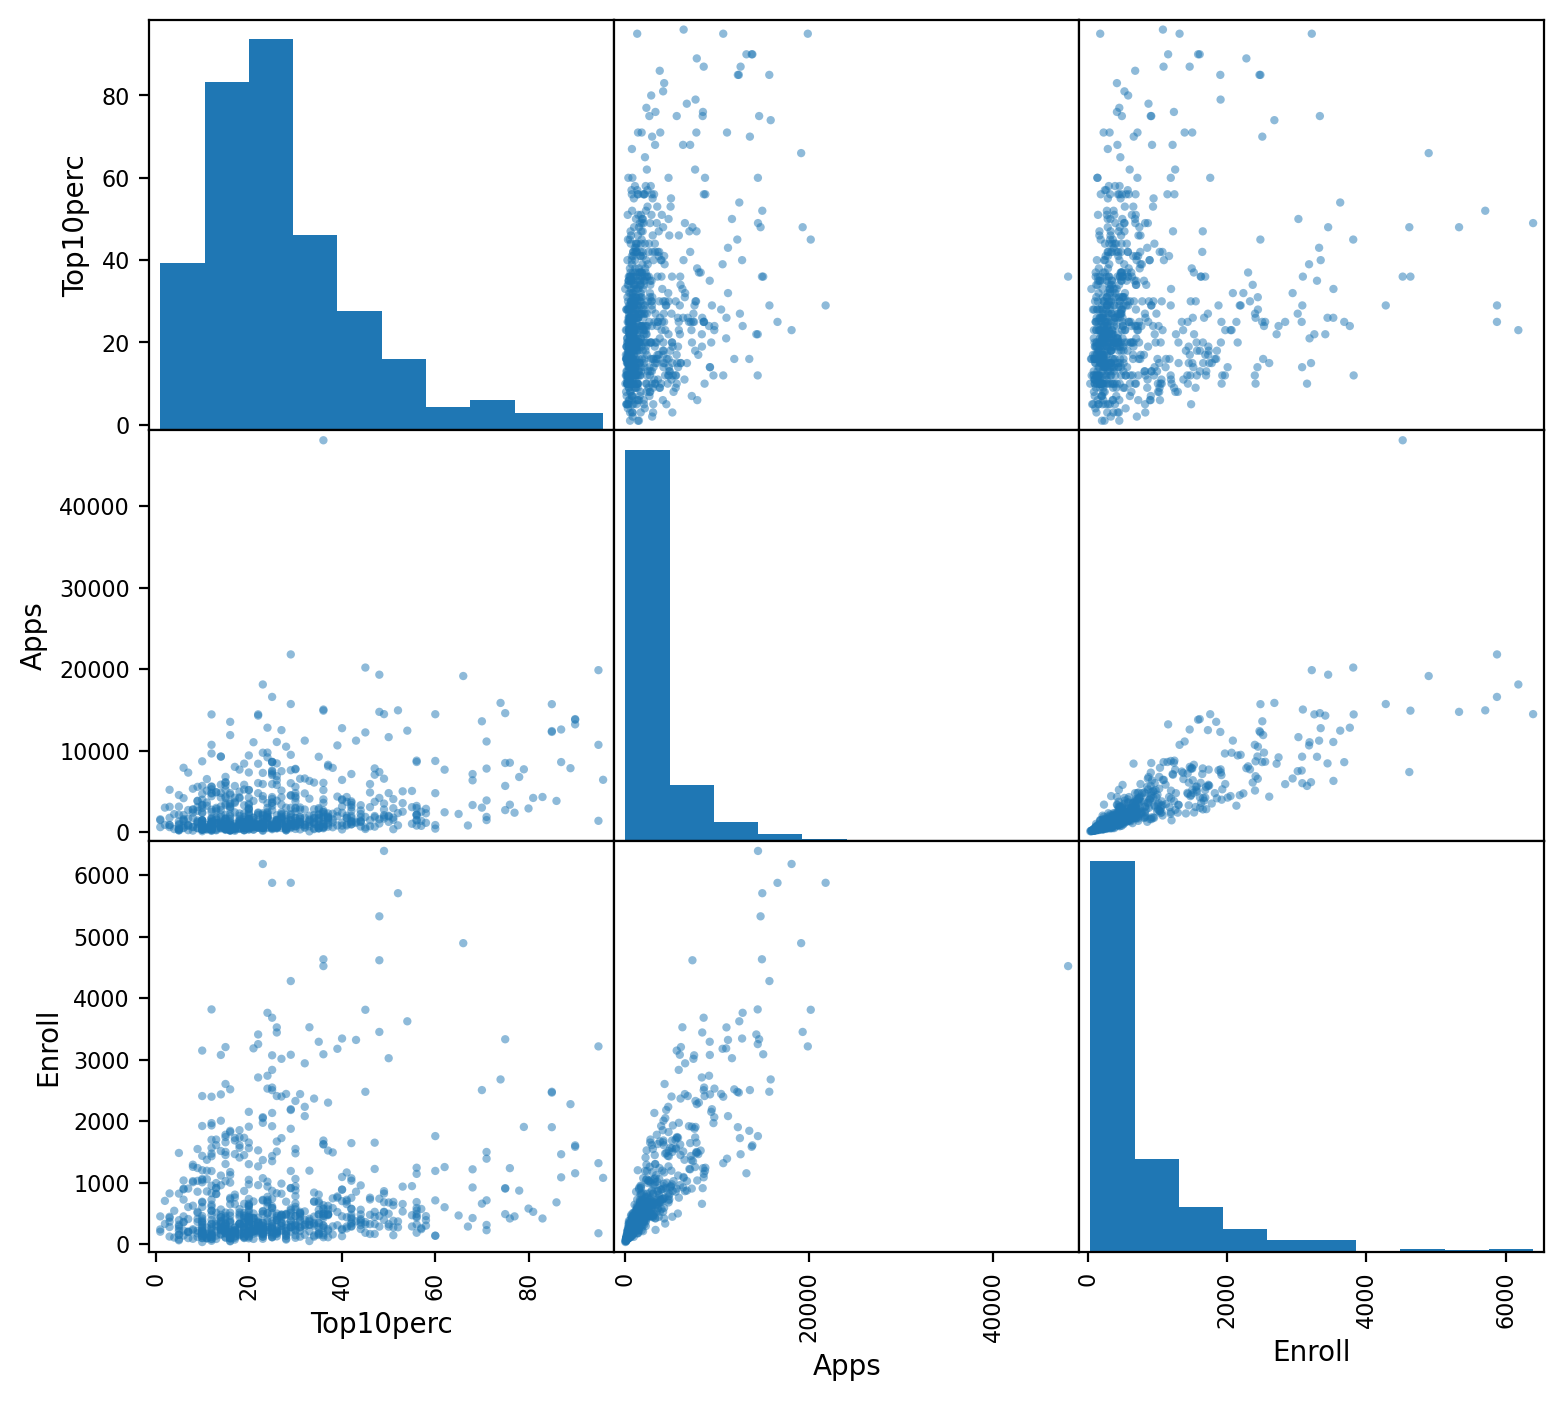

In [3]:
pd.plotting.scatter_matrix(
    college[["Top10perc", "Apps", "Enroll"]],
    figsize=(9, 8)
);

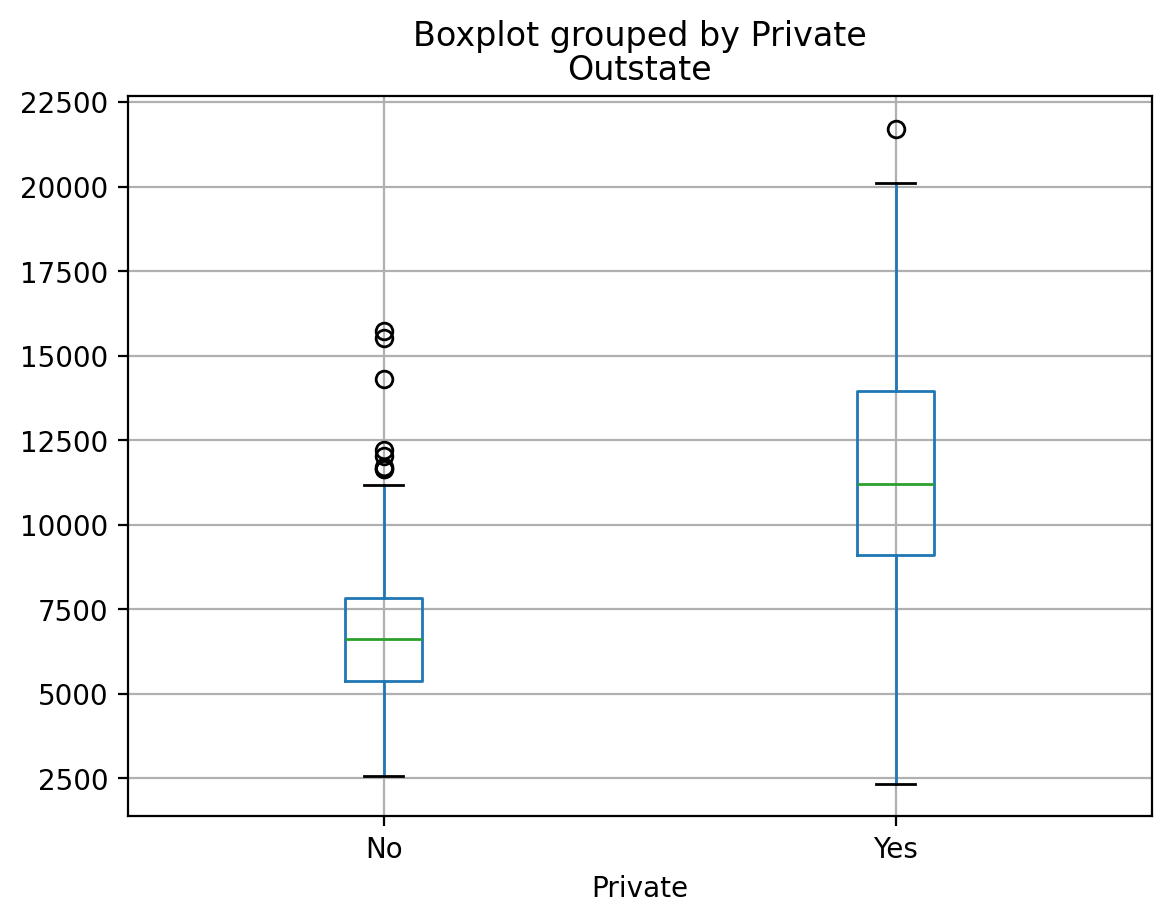

In [4]:
college.boxplot(
    column="Outstate", by="Private"
);

In [5]:
college["Elite"] = pd.cut(college["Top10perc"] / college["Enroll"],
                          bins=[0, .5, 1],
                          labels=["No", "Yes"])

college["Elite"].value_counts()

No     775
Yes      2
Name: Elite, dtype: int64

In [6]:
college.loc[lambda df: df["Elite"] == "Yes"]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
110,Yes,81,72,51,33,71,139,3,8730,3600,400,800,92,92,9.3,17,10922,58,Yes
251,Yes,1377,572,178,95,100,654,5,17230,6690,700,900,100,100,8.2,46,21569,100,Yes


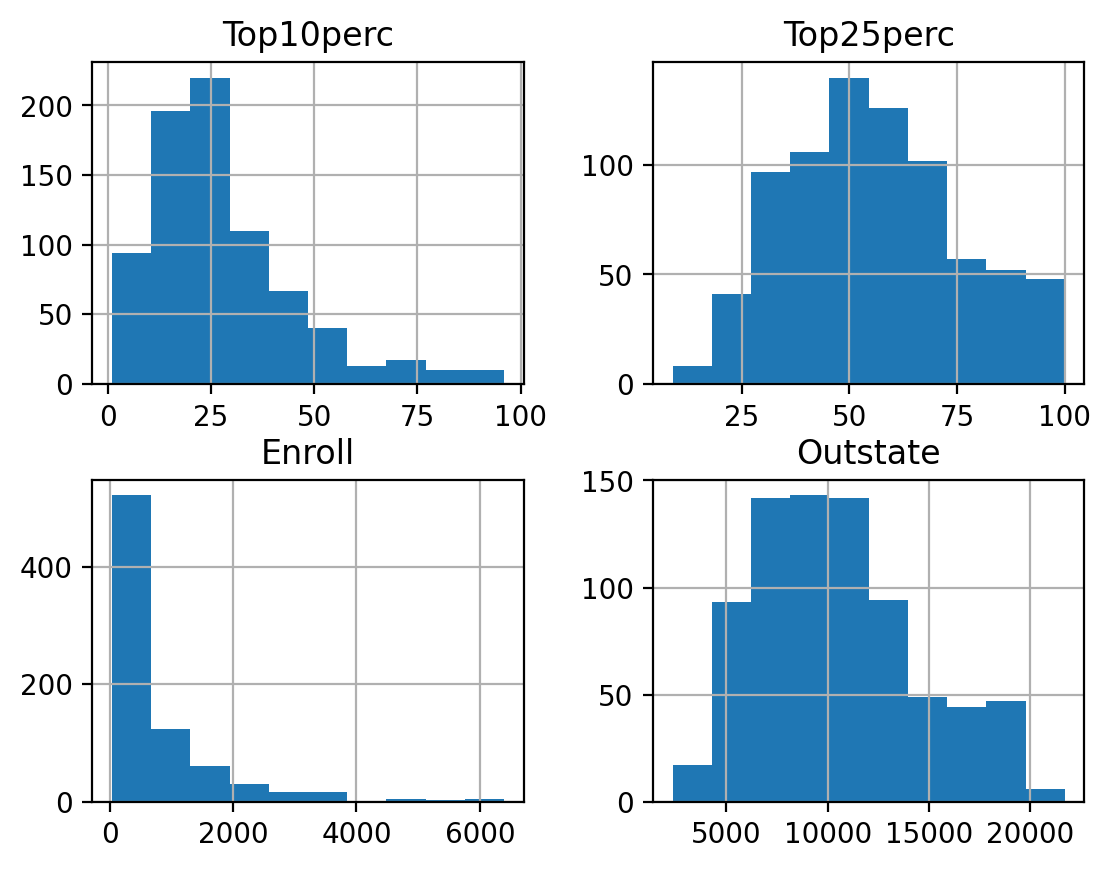

In [7]:
cols2plot = ["Top10perc", "Top25perc", "Enroll", "Outstate"]

college[cols2plot].hist();

### Auto

In [8]:
auto = ISLP.load_data("Auto")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
def range(x): return x.max() - x.min()
num_cols = [col for col in auto.columns if auto[col].dtype != "O"]

In [10]:
auto[num_cols].apply(["mean", "std", range]).T

,mean,std,range
mpg,23.445918,7.805007,37.6
cylinders,5.471939,1.705783,5.0
displacement,194.411990,104.644004,387.0
horsepower,104.469388,38.491160,184.0
weight,2977.584184,849.402560,3527.0
acceleration,15.541327,2.758864,16.8
year,75.979592,3.683737,12.0
origin,1.576531,0.805518,2.0


In [11]:
auto_subset = pd.concat([auto[:10], auto[86:]])
auto_subset[num_cols].apply(["mean", "std", range]).T

,mean,std,range
mpg,24.407595,7.863285,35.6
cylinders,5.373418,1.654179,5.0
displacement,187.512658,100.114616,387.0
horsepower,100.848101,35.954147,184.0
weight,2936.534810,811.874450,3348.0
acceleration,15.717405,2.713876,16.3
year,77.136076,3.123464,12.0
origin,1.601266,0.819910,2.0


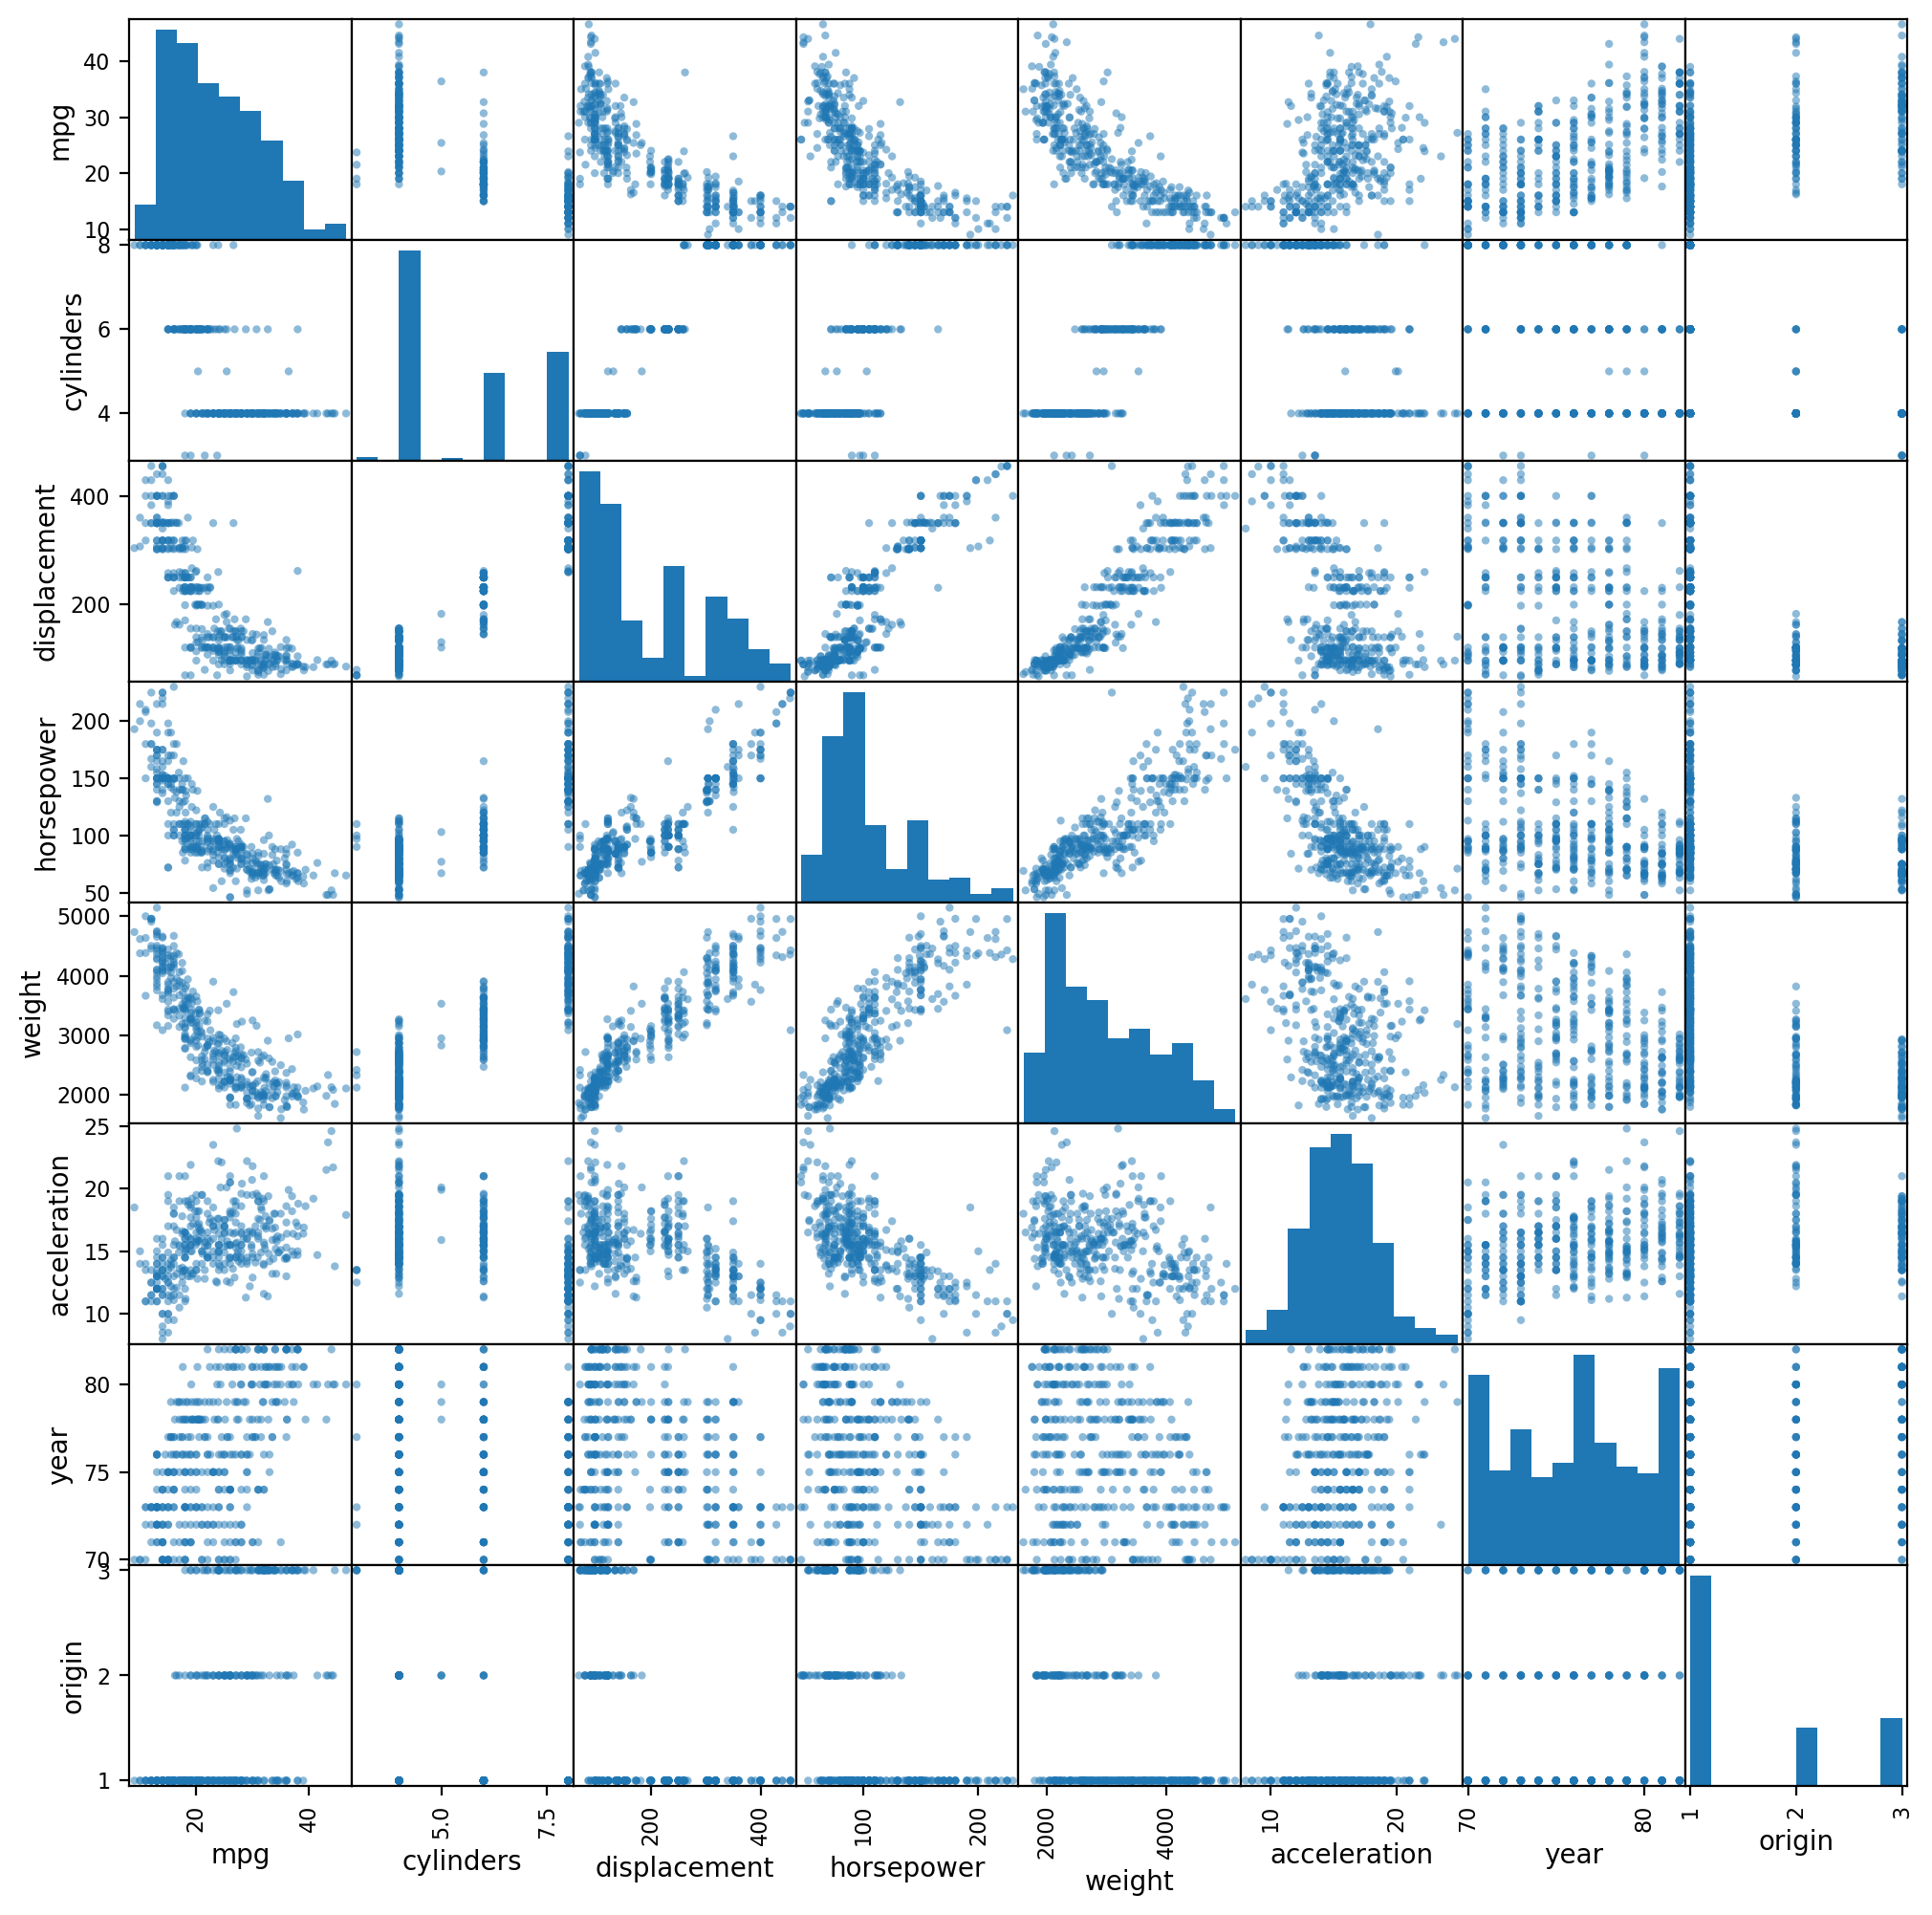

In [14]:
pd.plotting.scatter_matrix(
    auto[num_cols], figsize=(12, 12)
);

### Boston

In [16]:
housing = ISLP.load_data("Boston")
housing.info()
housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
